# 離散畳み込み (Discrete Convolution) の精度保証

$\newcommand{\im}{\mathrm{i}}$

## 離散フーリエ変換 (DFT)
離散畳み込みを理解するために、離散フーリエ変換を以下で定義する。

**定義**　$b = (b_0, \dots , b_{2M-2}) \in \mathbb{C}^{2M-1} $ に対して、$a = \mathcal{F}(b) \in \mathbb{C}^{2M-1}$ を

$$
a_k = \mathcal{F}_k(b) := \sum_{j=0}^{2M-2} b_j e^{-2\pi \im \left(\frac{jk}{2M-1}\right) },\quad |k|<M
$$

とし、これを **離散フーリエ変換(DFT)** と呼ぶ。

## 逆離散フーリエ変換 (IDFT)
**定義**　$a = (a_k)_{|k| < M} = (a_{-M+1}, \dots , a_{M-1}) \in \mathbb{C}^{2M-1}$ に対して、$b = \mathcal{F}^{-1} (a) \in \mathbb{C}^{2M-1}$を

$$
b_j = \mathcal{F}^{-1}_j (a) := \sum_{k = -M+1}^{M-1} a_k e^{2 \pi \im \left(\frac{jk}{2M-1}\right)} \quad j=0, \dots , 2M-2
$$

とし、**逆離散フーリエ変換(IDFT)** と呼ぶ。

**注意**　一般的なDFT/IDFTはスケーリング係数をつけた形で定義されることが多い。この点で上の定義は一般的な定義と違う。

## 離散畳み込みのアルゴリズム

$u_1, u_2$を周期 $L$ の周期関数とし、周波数を $\omega = \frac{2\pi}{L}$ とする。このとき、$u_1, u_2$をフーリエ級数展開すると、

$$
    u_1(t) = \sum_{k \in \mathbb{Z}} a_{k}^{(1)} e^{\im k\omega t} , \quad a^{(1)} = (a_{k}^{(1)})_{k \in \mathbb{Z}} \\
    u_2(t) = \sum_{k \in \mathbb{Z}} a_{k}^{(2)} e^{\im k\omega t} , \quad a^{(2)} = (a_{k}^{(2)})_{k \in \mathbb{Z}}.
$$

そして、これらの周期関数の積は、

$$
    u_1(t)u_2(t) = \sum_{k \in \mathbb{Z}} (a^{(1)}*a^{(2)})_{k}  e^{\im k\omega t}
$$

と表される。ここで $ (a^{(1)}*a^{(2)})_k$ を **離散畳み込み** といい、

$$
     (a^{(1)}*a^{(2)})_k = \sum_{k_1 + k_2 = k \\ k_1 , k_2 \in \mathbb{Z}} a_{k_1}^{(1)} a_{k_2}^{(2)} , \quad k \in \mathbb{Z}
$$

と表される。


数値計算への応用を意識すると、$u_1, u_2$ のような有限次元のフーリエ級数で表される周期関数が $p$ 個 ($p \in \mathbb{N}$) あったとき、関数 $u_i(t)$ が

$$
    u_i(t) = \sum_{|k| < M} a_{k}^{(i)} e^{\im k\omega t} , \quad a^{(i)} = (a_{k}^{(i)})_{|k| < M} \quad
    i = 1 , \cdots ,p \quad M \in \mathbb{Z}
$$

と表されたとすると、離散畳み込みはこれらの周期関数の積

$$
    u_1(t)\cdots u_p(t) = \sum_{|k| \leq p(M-1)}(a^{(1)}* \cdots *a^{(p)})_k e^{\im k\omega t}
$$

を表す事になる。ここで

$$
    (a^{(1)}* \cdots *a^{(p)})_k = \sum_{k_1 + \cdots + k_p = k,\\ |k| \leq p(M-1), \\ |k_1| , \cdots ,|k_p|<M} a_{k_1}^{(1)} \cdots  a_{k_p}^{(p)}
$$

と表される。


### 畳み込み定理
畳み込みを離散フーリエ変換したものは、それぞれのフーリエ係数の離散フーリエ変換の積になる。

$$
\begin{aligned}
    \mathcal{F}(a^{(1)}* \cdots *a^{(p)}) &= \mathcal{F}(a^{(1)})\hat{\ast} \cdots \hat{\ast}\mathcal{F}(a^{(p)}) \\
    &= b^{(1)}\hat{\ast}\cdots \hat{\ast}b^{(p)}
\end{aligned}
$$

ここで $ b^{(1)}\hat{\ast} \cdots \hat{\ast}b^{(p)}$ におけるベクトル同士の積は、要素毎の積を表す。

### 離散フーリエ変換を使った畳み込みの計算方法(FFTアルゴリズム) 

実際の畳み込みの計算方法について説明する。

周期$L$、変数$t$の周期関数 $u_i(t)$ が有限項のフーリエ級数

$$
    u_i(t) = \sum_{|k|<M} a_{k}^{(i)} e^{\im k\omega t} , \quad a^{(i)} = (a_{k}^{(i)})_{|k|<M} 
$$

で表されているとする。このとき、$p$ 個の関数の積

$$
    u_1(t)\cdots u_p(t) = \sum_{|k| \leq p(M-1)}c_k e^{\im k\omega t}
$$

を表現するフーリエ係数 $(c_k)_{|k| \leq p(M-1)}$ を以下の計算方法により求める。

---

### **FFTアルゴリズム**：

**入力**: $a^{(i)} = (a^{(i)}_k)_{|k|<M}\in\mathbb{C}^{2M-1} \quad (i = 1, \cdots , p)$

**step1**: エイリアシングエラーを防ぐために、入力された値 $a^{(i)}$ の両脇に $(p-1)M$ 個の $0$ を付け加える。これを $\tilde{a}^{(i)}$ と書く。

$$
    \tilde{a}^{(i)} = (\underbrace{0, \cdots , 0}_{(p-1)M\text{個}}, \underbrace{a^{(i)}_{-M+1}, \cdots , a^{(i)}_{M-1}}_{2M-1\text{個}},\underbrace{0, \cdots , 0}_{(p-1)M\text{個}}) \in \mathbb{C}^{2pM-1}.
$$

**step2**: step1で得た値 $\tilde{a}^{(i)}$ に対して逆離散フーリエ変換を行う。変換した後の値を $\tilde{b}^{(i)}$ と置く。

$$
    \tilde{b}^{(i)} = \mathcal{F}^{-1}(\tilde{a}^{(i)}) \in \mathbb{C}^{2pM-1}.
$$

**step3**: $ (\tilde{b}^{(1)} \hat{*} \cdots \hat{*} \tilde{b}^{(p)}) $を計算する。上記の畳み込みの定理と同じく、このベクトル同士の積は、要素毎の積を表す。

$$
    (\tilde{b}^{(1)} \hat{*} \cdots \hat{*} \tilde{b}^{(p)} )_{j} = \tilde{b}^{(1)}_j \cdots \tilde{b}^{(p)}_j , \quad j = 0, \cdots , 2pM-2.
$$

**step4**: step3で求めた$ (\tilde{b}^{(1)} \hat{*} \cdots \hat{*} \tilde{b}^{(p)}) $に対して、離散フーリエ変換を行い、得た値を $2pM-1$ で割る。

$$
     \tilde{c} = \frac{1}{2pM-1} \mathcal{F} (\tilde{b}^{(1)} \tilde{*} \cdots \tilde{*} \tilde{b}^{(p)}). %\quad |k| \leq p(M-1)
$$

求めた $\tilde{c}=(\tilde{c}_k)_{|k|<pM}$ のうち、実際に必要なのは両脇の $p-1$ 個を取り除いた $|k| \leq p(M-1)$ の範囲である。

$$
   \tilde{c} = (\underbrace{\tilde{c}_{-pM+1}, \cdots}_{p-1 \text{個いらない}}, \underbrace{\tilde{c}_{-p(M-1)}, \cdots , \tilde{c}_{p(M-1)}}_{=:c},\underbrace{\cdots ,\tilde{c}_{pM-1}}_{p-1 \text{個いらない}}) \in \mathbb{C}^{2pM-1}.
$$


**出力**: $c = (c_k)_{|k|\le p(M-1)}\in\mathbb{C}^{2p(M-1)+1}$.

---

### 具体例
適当に周期関数を決めて、離散畳み込みを行ってみる。はじめに、以前のフーリエ級数のページで作った関数を`FourierChebyshev.jl`として読み込む。

In [1]:
versioninfo()

Julia Version 1.7.2
Commit bf53498635 (2022-02-06 15:21 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i9-10900K CPU @ 3.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, skylake)


In [2]:
include("FourierChebyshev.jl");

具体的に周期関数を $f(x)=\frac{\exp(\sin(5x))}{1+\sin(\cos(x))}$ とし、フーリエ係数について畳み込みを行う。

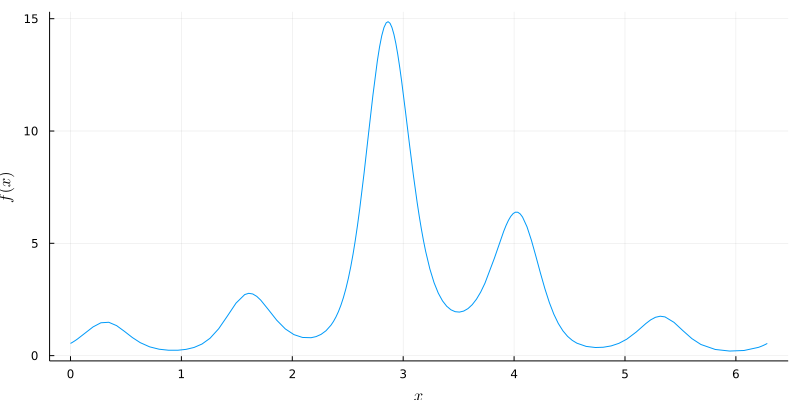

In [3]:
#f(x)の概形
f(x) = exp(sin(5x))/(1+sin(cos(x)))
plot(f,0,2π,size=(800,400),legend=false,xlabel="\$x\$", ylabel="\$f(x)\$")
# savefig("periodicfunc.pdf")

Juliaのパッケージ`ApproxFun.jl`で $f(x)$ を近似してみると、グラフは下のようになる。

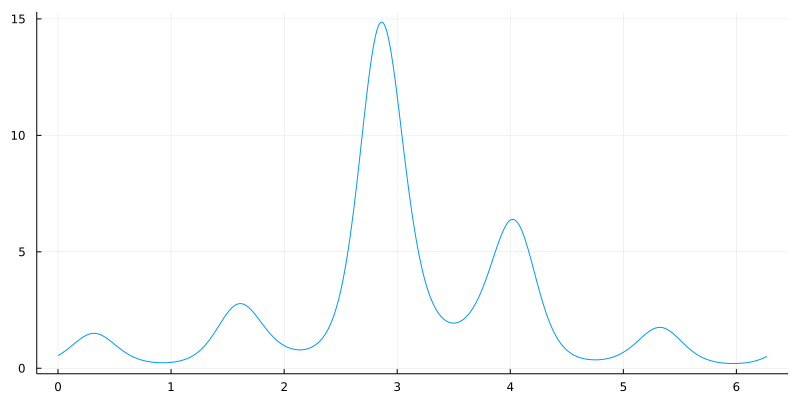

In [4]:
using ApproxFun
fc = Fun(f,Laurent())
plot(real(fc),size=(800,400),legend=false)

フーリエ係数を比較すると一致することが確認できる。

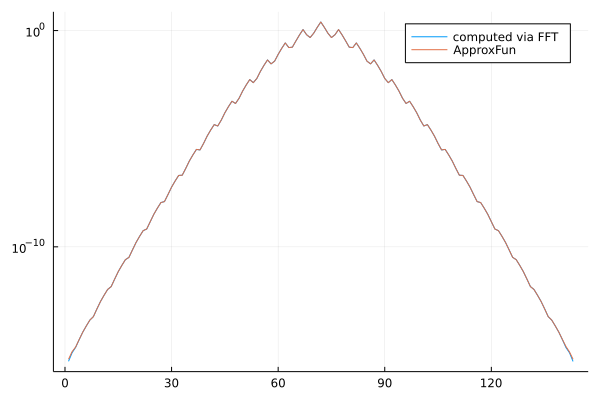

In [5]:
m = ncoefficients(fc)
M = Int((m+1)/2)
c = coefficients(fc) # coefficients of ApproxFun
function index_shift(c) # convert c -> fourier coeffs
    return [reverse(c[2:2:end]);c[1:2:end]]
end
a = fouriercoeffs(f,M)
plot(abs.(a),yscale=:log10,label="computed via FFT")
plot!(abs.(index_shift(c)),yscale=:log10,label = "ApproxFun")

この周期関数の2乗をする場合の畳み込みについて考えてみよう。2乗した関数の概形は、

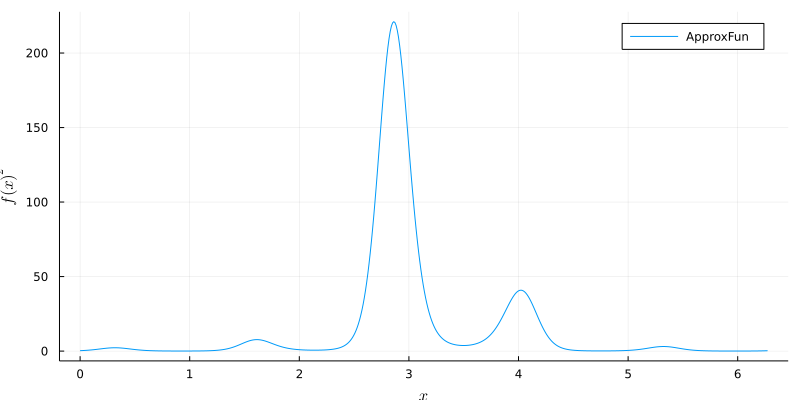

In [6]:
plot(real(fc)^2,size=(800,400),xlabel="\$x\$", ylabel="\$f(x)^2\$",label = "ApproxFun")
# savefig("periodicfunc_pow2.pdf")

一方、FFTアルゴリズムを用いて2乗した関数のフーリエ係数を求め、得たフーリエ級数の概形をプロットすると次のようになる。

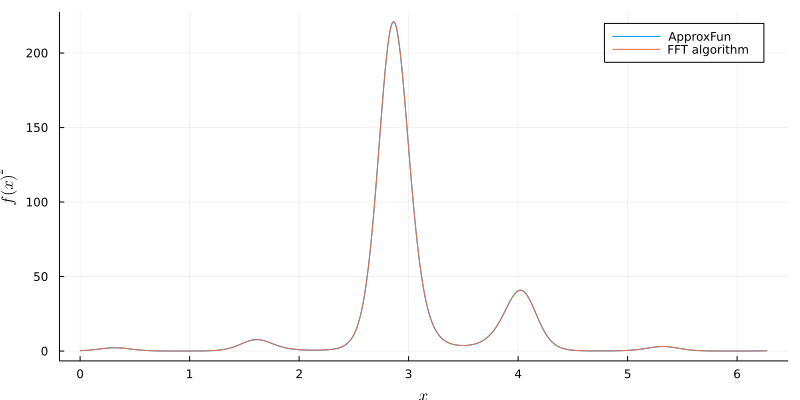

In [7]:
# FFT Algorithm
p = 2
N = (p-1)*M
ta = [zeros(N,1);a;zeros(N,1)] # 1. Padding zeros
tb = ifft(ifftshift(ta)) # 2. IFFT of ta
tbᵖ = tb.^p # 3. tb*^tb
cᵖ = fftshift(fft(tbᵖ))*(2.0*p*M-1)^(p-1) # 4. FFT of tb2 

plot_fourier!(cᵖ,label="FFT algorithm")
# savefig("periodicfunc_pow2-1.pdf")

二つの概形が一致しているのが分かる（水色と赤の曲線がほぼ一致している）。

次に別の周期関数を $f(x)= \mathop{\mathrm{erf}}(\sin(3x)+\cos(2x))^4$ とする。

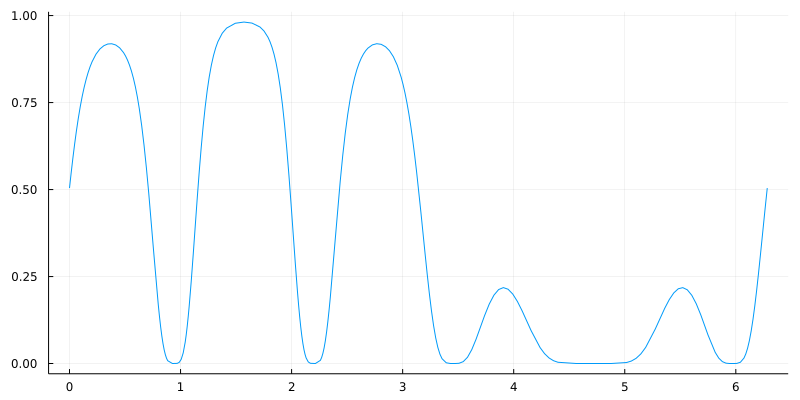

In [8]:
using SpecialFunctions
f(x) = erf(sin(3x)+cos(2x))^4
plot(f , 0 , 2π, legend=false, size=(800,400))

関数が与えられたら、そのフーリエ係数を計算する`fouriercoeffs`を使って得たフーリエ係数の離散畳み込み（`powerconvfourier`）をFFTアルゴリズムにより計算し、関数の冪乗を計算できる。解の概形を重ねてプロットするとほぼ一致している様子がわかる。

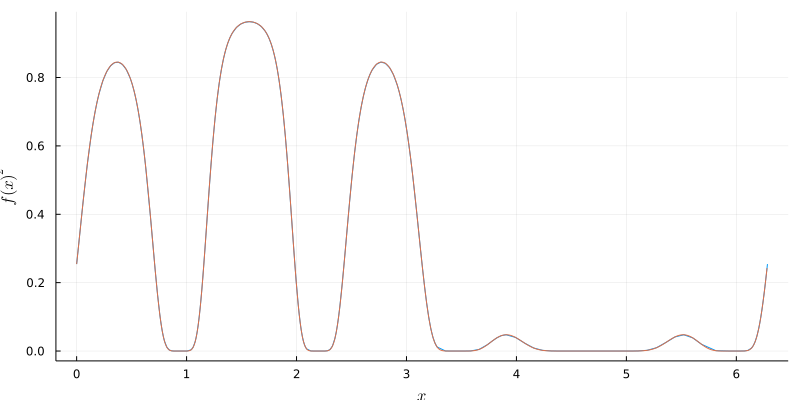

In [9]:
M = 150
p = 2
# f(x) = erf(sin(3x)+cos(2x))^4
g(x) = f(x)^p
plot(g,0,2π,size=(800,400),legend=false,xlabel="\$x\$", ylabel="\$f(x)^$(p)\$")

a = fouriercoeffs(f,M) # size(a) = 2M-1
# plot(abs.(a),yscale=:log10,)


function powerconvfourier(a::Vector{Complex{T}},p) where T
    M = Int((length(a)+1)/2)
    N = (p-1)*M
    ta = [zeros(N);a;zeros(N)] # 1. Padding zeros: size(ta) = 2pM-1
    tb = ifft(ifftshift(ta)) # 2. IFFT of ta
    tbᵖ = tb.^p # 3. tb*^tb
    cᵖ = fftshift(fft(tbᵖ))*(2.0*p*M-1)^(p-1)
    return cᵖ[N+1:end-N], cᵖ[p:end-(p-1)]# return (truncated, full) version
end

ap, ap_full = powerconvfourier(a,p)
plot_fourier!(ap_full)
# plot(abs.(ap),yscale=:log10,)
# plot!(abs.(ap_full),yscale=:log10,)
# savefig("periodicfunc_powp.pdf")

## 離散畳み込みの精度保証付き数値計算

離散畳み込みの精度保証を行う。離散畳み込みのアルゴリズムには、FFTが含まれるため、まず、FFTの精度保証を行うための関数 `verifyfft`（FFTの精度保証は[verifyfft.ipynb](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/verifyfft.html)を参照）を用意する。

In [10]:
using IntervalArithmetic:Interval
include("IntervalFunctions.jl")

verifyfft (generic function with 2 methods)

In [11]:
M = 150
p = 2
f(x) = erf(sin(3x)+cos(2x))^4
g(x) = f(x)^p

a = fouriercoeffs(f,M) # size(a) = 2M-1
ia = map(Interval, a)

length_ia = 2M-1
length_ia_ext = nextpow(2,length_ia)
n = Int((length_ia_ext - length_ia + 1)/2) # 2n-1
ia_ext = zeros(Complex{Interval},length_ia_ext)
ia_ext[n+1:end-n+1] = ia
verifyfft(ia_ext,1)# sign = 1(fft), -1(ifft)

512-element Vector{Complex{Interval{Float64}}}:
   [0.504305, 0.504306] + [-2.78302e-16, 3.04566e-16]im
 [-0.540193, -0.540192] + [-1.44584e-15, 1.33509e-15]im
   [0.574528, 0.574529] + [-1.26784e-15, 1.33171e-15]im
 [-0.607123, -0.607122] + [-2.35539e-15, 2.26e-15]im
   [0.637836, 0.637837] + [-1.10737e-15, 1.11361e-15]im
 [-0.666586, -0.666585] + [-2.62722e-15, 2.57583e-15]im
   [0.693331, 0.693332] + [-2.00448e-15, 2.15707e-15]im
 [-0.718077, -0.718076] + [-2.91309e-15, 2.83349e-15]im
   [0.740851, 0.740852] + [-9.70835e-16, 1.08807e-15]im
 [-0.761718, -0.761717] + [-2.75995e-15, 2.59531e-15]im
   [0.780751, 0.780752] + [-2.36097e-15, 2.45732e-15]im
 [-0.798048, -0.798047] + [-4.09771e-15, 3.69547e-15]im
   [0.813706, 0.813707] + [-1.78206e-15, 2.02556e-15]im
                           ⋮
 [0.0888341, 0.0888342] + [-2.26611e-15, 2.16547e-15]im
 [-0.112885, -0.112884] + [-4.12373e-15, 4.08214e-15]im
   [0.140088, 0.140089] + [-3.33816e-15, 3.04431e-15]im
 [-0.170218, -0.170217] + [-3.

`verifyfft`は、要素数が2のべき乗の場合しか実行できないので、step1のpaddingの部分で要素数を調整する。

$$
\tilde{a}=(\underbrace{0, \cdots , 0}_{L\text{個}},\underbrace{0, \cdots , 0}_{N=(p-1)M\text{個}}, \underbrace{a_{-M+1}, \cdots , a_{M-1}}_{2M-1\text{個}},\underbrace{0, \cdots , 0}_{N\text{個}},\underbrace{0, \cdots , 0}_{L-1\text{個}}) \in \mathbb{C}^{2pM-2+2L}
$$

$$
c=(\underbrace{0, \cdots , 0}_{L\text{個}},\underbrace{0, \cdots , 0}_{(p-1)\text{個}}, \underbrace{a_{-p(M-1)}, \cdots , a_{p(M-1)}}_{2p(M-1)+1\text{個}},\underbrace{0, \cdots , 0}_{(p-1)\text{個}},\underbrace{0, \cdots , 0}_{L-1\text{個}}) \in \mathbb{C}^{2pM-2+2L}.
$$

このとき $2pM-2+2L$ の要素数をJuliaの `nextpow` 関数で取得して $L$ を決定する。

step1の`ia_ext`が上の $\tilde{a}$ を指し、`ic_ext`が $c$ である。2のべき乗になるようにpaddingした分、関数の最後に取り出す値の範囲に注意が必要。また、区間演算とベクトル、両方の型に対応できるように、多重ディスパッチを利用する関数を用意。

In [12]:
function powerconvfourier(a::Vector{Complex{Interval{T}}},p) where T
    M = Int((length(a)+1)/2) # length(a) = 2M-1
    N = (p-1)*M
    ia = map(Interval, a)

    length_ia = 2*p*M-1
    length_ia_ext = nextpow(2,length_ia)# 2pM-2+2L
    
    L = Int((length_ia_ext - length_ia + 1)/2)
    
    # step.1 : padding (p-1)M + L zeros for each sides
    ia_ext = zeros(Complex{Interval},length_ia_ext)
    ia_ext[L+N+1:end-L-N+1] = ia  #\tilda{a}

    # step.2 : inverse fft
    ib_ext = verifyfft(ifftshift(ia_ext), -1) #sign = -1 : ifft
    
    # step.3 : power p elementwisely
    ib_extᵖ = ib_ext.^p
    
    # step.4 : fft with rescaling
    ic_extᵖ = fftshift(verifyfft(ib_extᵖ, 1)) * length_ia_ext^(p-1)  #sign = 1 : fft

    return ic_extᵖ[L+N+1:end-N-L+1], ic_extᵖ[L+p:end-(L+p-2)] # return (truncated, full) version
end

powerconvfourier (generic function with 2 methods)

In [13]:
c,c_full = powerconvfourier(a,2)
ic,ic_full = powerconvfourier(ia,2);# 多重ディスパッチ

区間演算は、数値計算で得た値の範囲全体を含むため、ic_full $\in$ c_fullが成り立つ。

また、下の図から精度保証をした場合は、係数の両端に$10^{-14}$ほどの誤差が含まれることがわかる。

all(c_full .∈ ic_full) = true


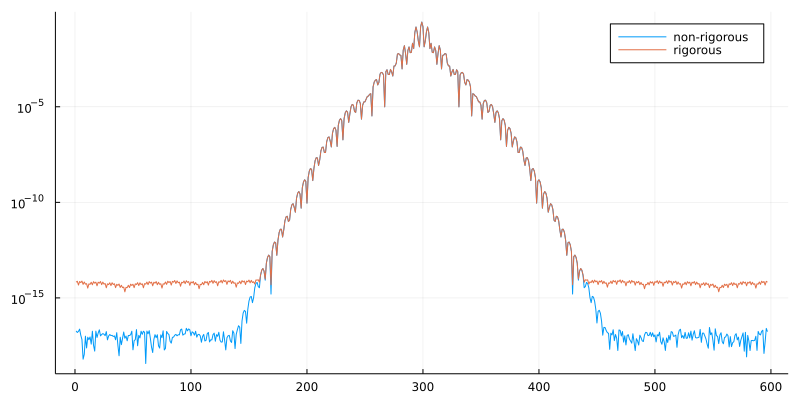

In [14]:
using IntervalArithmetic:mid
@show all(c_full .∈ ic_full)
plot(abs.(c_full),yscale=:log10,label="non-rigorous",size=(800,400))
plot!(mid.(abs.(ic_full)),yscale=:log10,label="rigorous")
# savefig("convolution_coeffs.pdf")

## チェビシェフ級数の冪乗を計算する

離散畳み込みのもう一つの応用例として、関数 $f(x) = \exp(-100(x-1/2)^2)$ をチェビシェフ級数で近似し、その係数の畳み込み計算を使って関数の冪乗を計算する方法を紹介する。チェビシェフ級数の取り扱い方は別記事で紹介予定。

In [15]:
include("FourierChebyshev.jl")

plot_cheb! (generic function with 1 method)

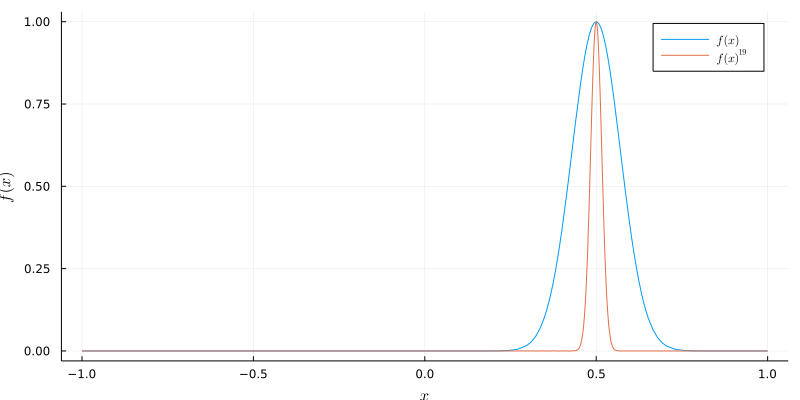

In [16]:
f(x) = exp(-(100*(x-0.5)^2))
plot(f,-1,1,label="\$f(x)\$",size=(800,400))
a = cheb(f) # Two-sided
M = length(a); p = 19

c = zeros(size(a))
c[1] = a[1]; c[2:end] = 0.5 * a[2:end] # Two-sided -> One-sided
FourierCoeffs = [reverse(c[2:end]); c]

cp, cp_full = powerconvfourier(complex(FourierCoeffs),p)

a[1] = real(cp[M]); a[2:end] = 2 * real(cp[M+1:end]) # One-sided -> Two-sided
N = Int((length(cp_full)+1)/2) #2N-1
a_full = zeros(N)
a_full[1] = real(cp_full[N]); a_full[2:end] = 2 * real(cp_full[N+1:end]) # One-sided -> Two-sided

# plot_cheb!(a,label="\$f(x)^{$p}\$")
plot_cheb!(a_full,label="\$f(x)^{$p}\$")
# savefig("gaussian_p.pdf")

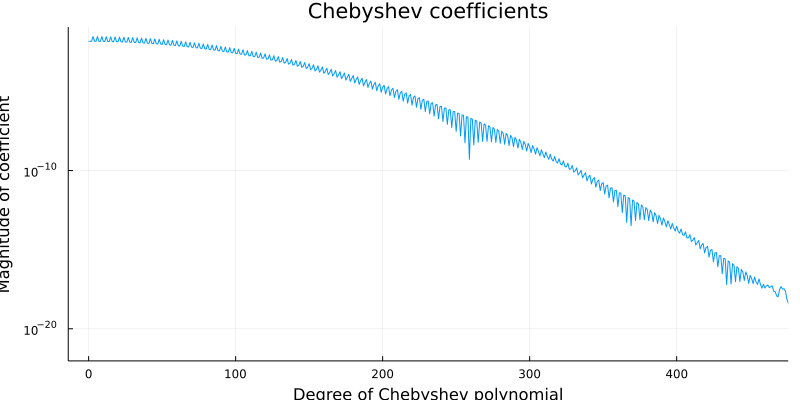

In [17]:
plot(plot_chebcoeffs(a_full),xlims=[0,462])
# savefig("gaussian_p_coeffs.pdf")

本資料は以下のような文献・Web ページ等を参考にこの文章を書いています。

### 参考文献

1. Jan Bouwe van den Berg, Jean-Philippe Lessard, Proceedings of Symposia in Applied Mathematics 74, American Mathematical Society, 2018.<br>
(力学系におけるNewton-Kantorovich型定理を使った精度保証付き数値計算の教科書、フーリエ級数・チェビシェフ級数の畳み込みを使った実践例をいくつか紹介している)
1. Jean-Philippe Lessard, Computing discrete convolutions with verified accuracy via Banach algebras and the FFT, Applications of Mathematics, 63(3):219–235, Jun 2018.<br>
(離散畳み込みのFFTアルゴリズムの分かりやすい紹介と、Banach環の性質を使った精度保証方法の提案をしている)
1. 井藤佳奈子, 高安亮紀, [Juliaで精度保証付き高速フーリエ変換](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/verifyfft.html), 2021.<br>
（区間演算を利用したFFTの精度保証方法をJuliaで実装する例を紹介している）
1. S. Rump. INTLAB - INTerval LABoratory. In T. Csendes, editor, Developments in Reliable Computing, pages 77–104. Kluwer Academic Publishers, Dordrecht, 1999. http://www.ti3.tuharburg.de/rump/.<br>
（MATLABの区間演算ツールボックスINTLABの紹介記事、本記事の`verifyfft`はINTLABに実装されている方法のコピー）

<div align="right">高橋和暉, <a href="http://www.risk.tsukuba.ac.jp/~takitoshi/">高安亮紀</a>，2022年2月28日</div>